In [13]:
import mediapipe as mp  # Import mediapipe
import cv2  # Import opencv
import csv
import os
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
import sklearn

In [14]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [15]:
def draw_mark(image, results22):
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

def cap_imag():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    k =cv2.waitKey(1500)
    cap.release()
    cv2.destroyAllWindows()
    return ret ,image

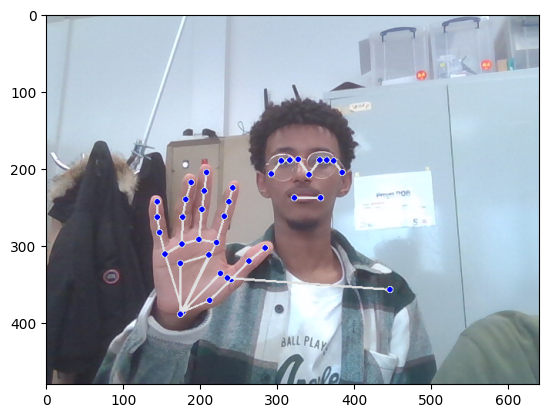

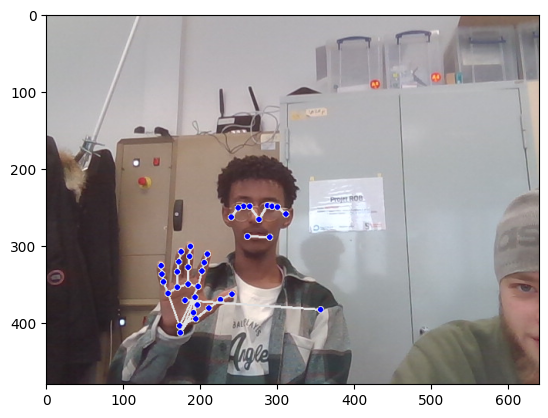

In [43]:
with mp_holistic.Holistic(static_image_mode=True) as holistic :
    
    ret,image=cap_imag()
    ret2,image2=cap_imag()

    results = holistic.process(image)
    results2 = holistic.process(image2)

    draw_mark(image2, results2)
    draw_mark(image, results)

plt.imshow(image)
plt.show()

plt.imshow(image2)
plt.show()

In [66]:
distance_epaules = 40
distance_nez = 20
origine1 = [(results.pose_landmarks.landmark[11].x+results.pose_landmarks.landmark[12].x)/2,(results.pose_landmarks.landmark[11].y+results.pose_landmarks.landmark[12].y)/2,(results.pose_landmarks.landmark[11].z+results.pose_landmarks.landmark[12].z)/2] #origine de l'image 1
distance1x = abs(results.pose_landmarks.landmark[11].x-results.pose_landmarks.landmark[12].x) #distance en x à normaliser
distance1y = abs(results.pose_landmarks.landmark[0].y-origine1[1])  #distance en y à normaliser
print(origine1)
pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
coords = np.concatenate([pose,lh,rh])
eg_ref = -0.1
nez_ref= -0.25
for i in range (0,int(np.shape(coords)[0])):
        coords[i] -= origine1[i%3]

x_coeff = eg_ref/coords[11*3+1]
y_coeff = nez_ref/coords[1]

for i in range (0,int(np.shape(coords)[0])):
    if(i%3==0):
        coords[i]*=x_coeff
    elif (i%1==0):
        coords[i]*=y_coeff



[0.5328545719385147, 0.728866845369339, -0.1885339468717575]


In [67]:
origine2 = [(results2.pose_landmarks.landmark[11].x+results2.pose_landmarks.landmark[12].x)/2,(results2.pose_landmarks.landmark[11].y+results2.pose_landmarks.landmark[12].y)/2,(results2.pose_landmarks.landmark[11].z+results2.pose_landmarks.landmark[12].z)/2] #origine de l'image 1
distance2x = abs(results2.pose_landmarks.landmark[11].x-results2.pose_landmarks.landmark[12].x) #distance en x à normaliser
distance2y = abs(results2.pose_landmarks.landmark[0].y-origine1[1])  #distance en y à normaliser
print(origine2)
pose2 = np.array([[res.x, res.y, res.z] for res in results2.pose_landmarks.landmark]).flatten() if results2.pose_landmarks else np.zeros(33*3)
lh2= np.array([[res.x, res.y, res.z] for res in results2.left_hand_landmarks.landmark]).flatten() if results2.left_hand_landmarks else np.zeros(21*3)
rh2 = np.array([[res.x, res.y, res.z] for res in results2.right_hand_landmarks.landmark]).flatten() if results2.right_hand_landmarks else np.zeros(21*3)
coords2 = np.concatenate([pose,lh,rh])
eg_ref = -0.1
nez_ref= -0.25
for i in range (0,int(np.shape(coords2)[0])):
        coords2[i] -= origine2[i%3]

x_coeff2 = eg_ref/coords2[11*3+1]
y_coeff2 = nez_ref/coords2[1]

for i in range (0,int(np.shape(coords2)[0])):
    if(i%3==0):
        coords2[i]*=x_coeff2
    elif (i%1==0):
        coords2[i]*=y_coeff2

[0.41962824761867523, 0.7862456142902374, -0.18650050461292267]


In [69]:
print(coords)
print(coords2)

[ 8.58461010e-06 -2.50000000e-01 -3.54694997e-01 -1.39846345e-01
 -2.84222685e-01 -3.12703213e-01 -2.27512014e-01 -2.83249622e-01
 -3.12422405e-01 -3.15592329e-01 -2.82057301e-01 -3.12494302e-01
  1.31534781e-01 -2.85221375e-01 -3.10145178e-01  2.41372928e-01
 -2.84134901e-01 -3.09881775e-01  3.42842835e-01 -2.82329002e-01
 -3.10117856e-01 -4.18742050e-01 -2.54758305e-01 -7.69097731e-02
  4.71996910e-01 -2.52242063e-01 -5.40306202e-02 -1.47441048e-01
 -1.97250889e-01 -2.72768461e-01  1.77237768e-01 -1.97092878e-01
 -2.66378079e-01 -1.01775140e+00  1.37031044e-02  1.58529178e-02
  1.01775140e+00 -1.37031044e-02 -1.58529178e-02 -1.28763272e+00
  2.33687430e-01 -2.61351223e-02  2.21902857e+00  2.59894158e-01
 -4.31833021e-01 -1.63142955e+00  5.06463063e-01 -1.91935914e-01
  1.61376556e+00  6.99768877e-02 -1.01064193e+00 -1.85151200e+00
  5.73126795e-01 -2.45143121e-01  1.61634944e+00 -4.59166966e-02
 -1.12112508e+00 -1.58204423e+00  5.67856509e-01 -2.59577364e-01
  1.25776510e+00 -6.66232